In [1]:
import numpy as np
import pandas as np
import os

import fastai

from fastai.vision.all import *


In [2]:
df = pd.read_csv('train_labels.csv')

In [3]:
df['label'].unique()

array([21, 29, 17, 50,  8, 42, 68, 10,  9, 39, 11, 44, 49,  5, 65, 61, 56,
       43, 54, 40, 23, 64, 58, 33, 45,  3, 12, 46, 59, 77, 14, 13, 18, 69,
       47, 63, 52, 66, 80, 30, 55, 53, 19, 67, 78, 24,  2, 25, 37, 57, 36,
        6,  1, 72, 27, 60, 31, 48, 74, 51, 15, 26, 75, 62,  4, 22, 41, 79,
       34, 73,  7, 71, 35, 38, 76, 28, 70, 16, 32, 20])

In [4]:
df['label'].value_counts()

71    525
37    494
57    491
61    490
9     489
     ... 
59    278
78    274
67    257
42    255
20     27
Name: label, Length: 80, dtype: int64

In [5]:
#df = df[:1000]

In [6]:
dblock = DataBlock(splitter=RandomSplitter(0.01))
dsets = dblock.datasets(df)

In [7]:
len(dsets.train),len(dsets.valid)

(30306, 306)

In [7]:
path= 'train_set/'
def get_x(r): return path + r['img_name']
def get_y(r): return str(r['label'])
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('train_set/train_20267.jpg', '51')

In [8]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(460),
                   splitter=RandomSplitter(0.1),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(df, bs=bs)

In [9]:
dls = get_dls(48, 256)

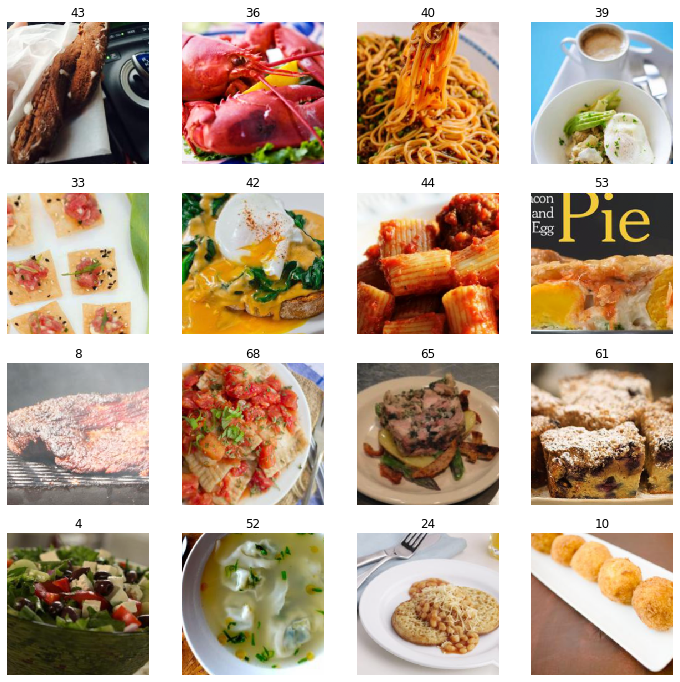

In [12]:
dls.show_batch(max_n=16, nrows=4)

In [10]:
model = xresnet101(n_out=dls.c)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=accuracy)
#Adding tensorboad callback 
#tboard_path = Path('tensorboard/' + 'food_recognition')
#learn.add_cbs(TensorBoardCallback('tensorboard/run_2', trace_model=True))
#learn.fit_one_cycle(4, 3e-3, cbs = SaveModelCallback(monitor='accuracy', comp=np.greater, fname='best_run2'))


/usr/local/lib/python3.6/dist-packages/fastai/learner.py:54: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


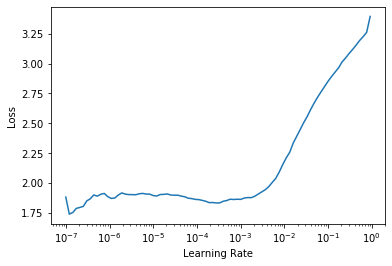

In [12]:
learn = learn.load('best_run5_medium')
lr_min,lr_steep = learn.lr_find()

In [ ]:
model = xresnet101(n_out=dls.c)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=accuracy)


In [13]:
learn.fit_one_cycle(100 ,3e-3, cbs = SaveModelCallback(monitor='accuracy', 
                                                     comp=np.greater, 
                                                     fname='best_run4_medium'))

IndexError: list index out of range

In [18]:
l = load_learner('export_small.pkl')
test_path = 'test_set/'
l.predict(test_path+'test_1.jpg')

("['70', '70', '7', '70', '70', '70', '74', '7', '70', '7', '72', '70', '70', '7', '7', '69', '7', '70', '70', '69', '70', '70', '70', '7', '69', '7', '70', '72', '70', '71', '7', '71', '7', '70', '7', '70', '7', '7', '70', '71', '7', '7', '72', '70', '70', '7', '7', '7', '70', '7', '70', '69', '70', '7', '7', '70', '70', '71', '70', '70', '71', '70', '7', '69', '7', '70', '70', '7', '7', '7', '70', '69', '7', '7', '71', '7', '7', '70', '70', '71']",
 tensor([-13.8860, -13.7797, -14.2563, -13.1759, -13.8662, -13.9852,  -9.9338,
         -14.3624, -13.9432, -14.0207, -11.9434, -13.1817, -13.8369, -14.2704,
         -14.5020, -15.1233, -14.5772, -13.6605, -13.1536, -15.4825, -13.4009,
         -13.3617, -13.2877, -14.3043, -15.4706, -14.2450, -13.3078, -11.5576,
         -13.1153, -12.2693, -14.2809, -12.3168, -14.5194, -13.2334, -14.1437,
         -13.8247, -14.8494, -14.5004, -13.1689, -12.5099, -14.7707, -14.4026,
         -11.3840, -13.6435, -13.5460, -14.7493, -14.6056, -14.2206, -1

FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'

In [17]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'epoch_20.pkl')
test_path = 'test_set/'
learn_inf.predict(test_path+'test_1.jpg')

('40',
 tensor(33),
 tensor([7.6719e-03, 1.1360e-03, 2.2494e-02, 1.4753e-04, 1.1437e-04, 1.9014e-02,
         8.1590e-05, 7.3186e-04, 6.2785e-02, 1.0803e-04, 1.0605e-03, 1.2405e-03,
         1.2722e-03, 1.3060e-02, 3.0172e-03, 1.2489e-03, 1.6373e-03, 1.1141e-04,
         7.9761e-04, 1.5079e-03, 5.8376e-05, 1.1514e-05, 5.0050e-04, 5.1564e-03,
         5.7104e-05, 5.1146e-03, 9.7941e-04, 1.0118e-05, 1.0893e-01, 2.6132e-04,
         1.1622e-02, 4.0613e-03, 4.1375e-03, 1.4906e-01, 3.0997e-03, 1.2954e-04,
         6.2549e-03, 5.5834e-02, 4.5617e-04, 1.7705e-04, 1.2267e-07, 7.6874e-02,
         1.1959e-03, 1.6105e-03, 8.4784e-04, 9.3763e-06, 5.2821e-03, 3.6739e-03,
         2.7489e-03, 7.9823e-03, 1.4833e-04, 7.1857e-04, 6.3189e-04, 1.1465e-01,
         3.1892e-02, 1.2262e-02, 1.6541e-02, 1.4159e-04, 3.7735e-04, 1.6511e-03,
         9.3458e-05, 8.7506e-03, 3.1223e-03, 4.5110e-03, 1.9576e-03, 3.6148e-03,
         6.7437e-02, 9.1791e-04, 6.4290e-04, 2.1244e-03, 5.3933e-04, 8.9872e-02,
        

In [ ]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

In [26]:
test_path = 'test_set/'
learn_inf.predict(test_path+'test_1.jpg')

("['70', '70', '7', '70', '70', '70', '74', '7', '70', '7', '72', '70', '70', '7', '7', '69', '7', '70', '70', '69', '70', '70', '70', '7', '69', '7', '70', '72', '70', '71', '7', '71', '7', '70', '7', '70', '7', '7', '70', '71', '7', '7', '72', '70', '70', '7', '7', '7', '70', '7', '70', '69', '70', '7', '7', '70', '70', '71', '70', '70', '71', '70', '7', '69', '7', '70', '70', '7', '7', '7', '70', '69', '7', '7', '71', '7', '7', '70', '70', '71']",
 tensor([-13.8860, -13.7797, -14.2563, -13.1759, -13.8662, -13.9852,  -9.9338,
         -14.3624, -13.9432, -14.0207, -11.9434, -13.1817, -13.8369, -14.2704,
         -14.5020, -15.1233, -14.5772, -13.6605, -13.1536, -15.4825, -13.4009,
         -13.3617, -13.2877, -14.3043, -15.4706, -14.2450, -13.3078, -11.5576,
         -13.1153, -12.2693, -14.2809, -12.3168, -14.5194, -13.2334, -14.1437,
         -13.8247, -14.8494, -14.5004, -13.1689, -12.5099, -14.7707, -14.4026,
         -11.3840, -13.6435, -13.5460, -14.7493, -14.6056, -14.2206, -1

In [18]:
preds,targs = learn_inf.tta()
accuracy(preds, targs).item()

/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


TypeError: 'NoneType' object is not subscriptable